## 1. Load Data

In [21]:
## assume working directory is the one that current juno is in
set.seed(1)
dt.path = "Data/BodyFat.csv"
dt.fat = read.csv(dt.path)
body.fat = subset(dt.fat, select = c(-IDNO, -BODYFAT))

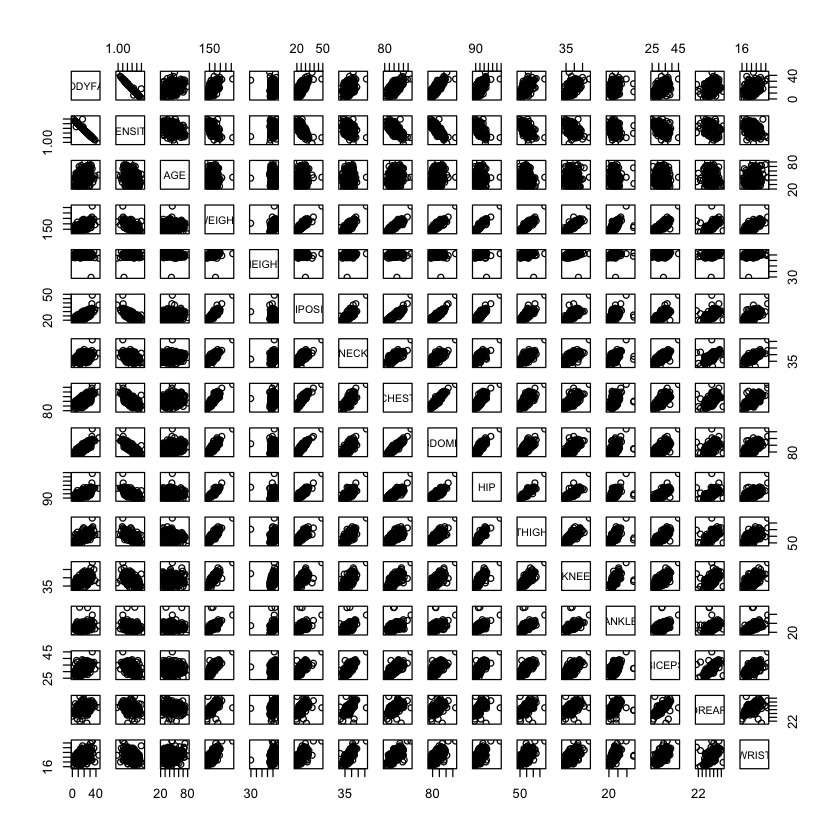

In [22]:
pairs( subset(dt.fat, select = c(-IDNO)) )

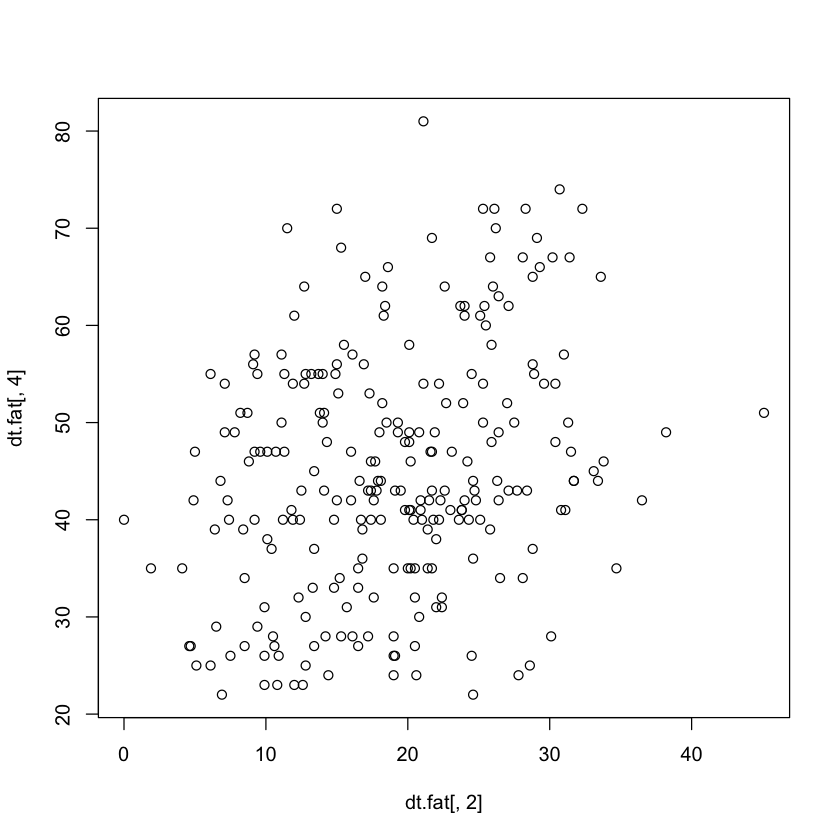

In [23]:
plot(dt.fat[,2], dt.fat[,4])

## 2. Data Cleaning

Given Siri's equation, we know that
$$B = \frac{495}{D} - 450\ ,\ where$$
* B = proportion of fat tissue * 100 = BODYFAT
* D = Body Density = DENSITY

This formula can be used to find outliers in data. 

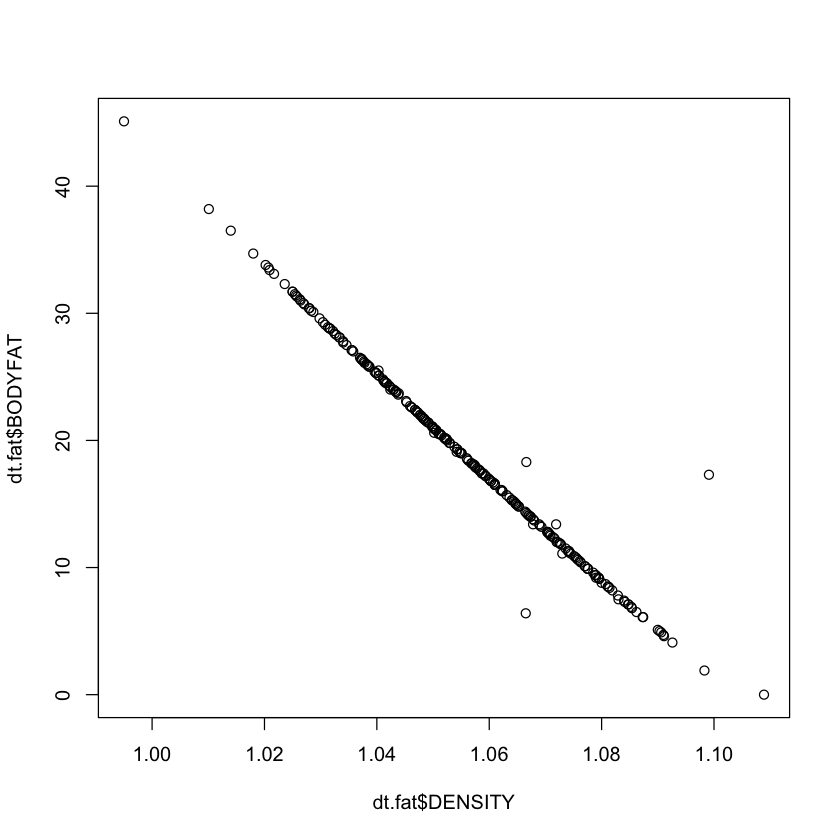

In [24]:
plot(dt.fat$BODYFAT ~ 1/dt.fat$DENSITY)

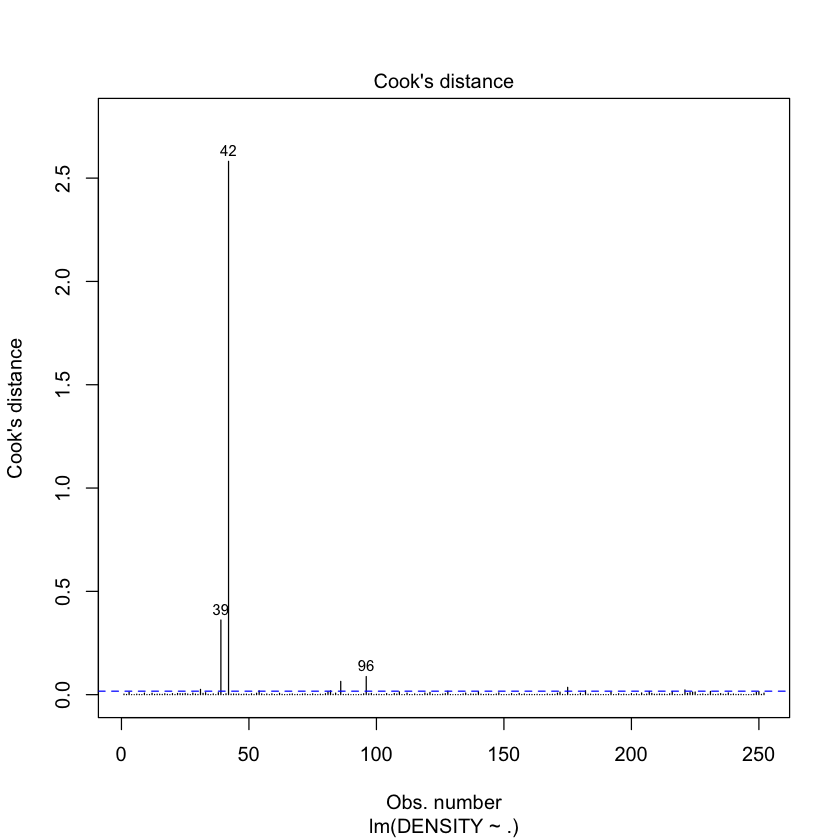

In [25]:
model.clean = lm(DENSITY ~ ., data = body.fat)
# summary(model.clean)$coefficient
plot(model.clean, which = 4)
abline(h = 4/(dim(body.fat)[1]-dim(body.fat)[2]), lty = 2, col = 'blue')

In [26]:
col.mean = round(sapply(body.fat, dim = 1, FUN = mean), digits = 2)
. = rbind(body.fat[c(39, 42, 96), ], col.mean)
rownames(.)[4] = ' Sample Mean'
.

,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,1.0202,46.00,363.15,72.25,48.90,51.20,136.20,148.10,147.7,87.30,49.10,29.6,45.00,29.00,21.40
42,1.0250,44.00,205.00,29.50,29.90,36.60,106.00,104.30,115.5,70.60,42.50,23.7,33.60,28.70,17.40
96,1.0991,53.00,224.50,77.75,26.10,41.10,113.20,99.20,107.5,61.70,42.30,23.2,32.90,30.80,20.40
Sample Mean,1.0600,44.88,178.92,70.15,25.44,37.99,100.82,92.56,99.9,59.41,38.59,23.1,32.27,28.66,18.23


* Sample 39 is highly overweighted.
* Sample 42 is unusually short.
* Sample 96 has relatively larger Cook's distance. However, \#96 is merely a stronger person whose body measurements are within normal range. 

**Therefore, \#39 and \#42 should be removed from our 'Rule-of-Thumb' model.**  
**However, \#96 should be kept in our model.**

In [27]:
body.fat.clean = body.fat[-c(39, 42),]

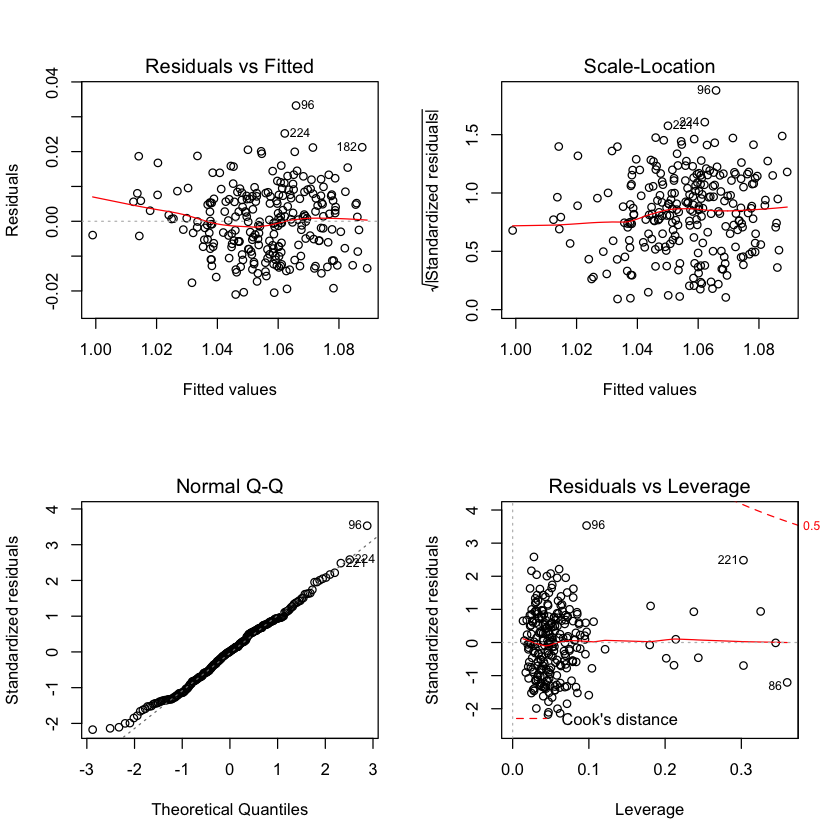

In [28]:
model.clean2 = lm(DENSITY ~ ., data = body.fat.clean)
layout(matrix(1:4, ncol = 2))
plot(model.clean2)

Given the above 4 plots, $96, 224, 182, 221, 86$ show up as outlier candidates.

In [29]:
col.mean.clean = round(sapply(body.fat.clean, dim = 1, FUN = mean), digits = 2)
. = rbind(body.fat[c(96, 224, 182, 221, 86), ], col.mean)
rownames(.)[6] = ' Sample Mean'
.

,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,1.0991,53.00,224.50,77.75,26.10,41.10,113.20,99.20,107.5,61.70,42.30,23.2,32.90,30.80,20.40
224,1.0874,55.00,142.25,67.25,22.20,35.20,92.70,82.80,91.9,54.40,35.20,22.5,29.40,26.80,17.00
182,1.1089,40.00,118.50,68.00,18.10,33.80,79.30,69.40,85.0,47.20,33.50,20.2,27.70,24.60,16.50
221,1.0706,54.00,153.25,70.50,24.50,38.50,99.00,91.80,96.2,57.70,38.10,23.9,31.40,29.90,18.90
86,1.0386,67.00,167.00,67.50,26.00,36.50,98.90,89.70,96.2,54.70,37.80,33.7,32.40,27.70,18.20
Sample Mean,1.0600,44.88,178.92,70.15,25.44,37.99,100.82,92.56,99.9,59.41,38.59,23.1,32.27,28.66,18.23


Sample 96, 224, 182, 221, 86 are relatively different from ordinary people, but their body measurements are within normal range.  
Therefore we do not delete these samples.  

## 3. Variable Selection

#### Back/forward selection uing A/BIC

In [30]:
model.full = lm(DENSITY ~ ., body.fat.clean)

In [31]:
model.aic.both = step(model.full, direction = "both", k = 2, trace = 0)
summary(model.aic.both)


Call:
lm(formula = DENSITY ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + BICEPS + WRIST, data = body.fat.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021582 -0.007279  0.000601  0.006674  0.035191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.074e+00  1.735e-02  61.893  < 2e-16 ***
AGE         -1.223e-04  6.473e-05  -1.890 0.059963 .  
ADIPOSITY   -1.543e-03  5.747e-04  -2.686 0.007742 ** 
NECK         9.943e-04  5.123e-04   1.941 0.053454 .  
CHEST        6.087e-04  2.225e-04   2.736 0.006681 ** 
ABDOMEN     -2.017e-03  2.067e-04  -9.760  < 2e-16 ***
HIP          5.720e-04  2.539e-04   2.253 0.025164 *  
BICEPS      -6.884e-04  3.571e-04  -1.928 0.055078 .  
WRIST        4.320e-03  1.106e-03   3.907 0.000121 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009904 on 241 degrees of freedom
Multiple R-squared:  0.7335,	Adjusted R-squared:  0.7247 
F-statistic:

In [73]:
model.bic.both = step(model.full, direction = "both", k = log(dim(body.fat.clean)[1]), trace = 0)
summary(model.bic.both)


Call:
lm(formula = DENSITY ~ ADIPOSITY + CHEST + ABDOMEN + HIP + WRIST, 
    data = body.fat.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021556 -0.006987  0.000647  0.006610  0.036011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0755380  0.0165213  65.100  < 2e-16 ***
ADIPOSITY   -0.0015618  0.0005664  -2.758 0.006264 ** 
CHEST        0.0006404  0.0002205   2.904 0.004027 ** 
ABDOMEN     -0.0021267  0.0001830 -11.624  < 2e-16 ***
HIP          0.0007386  0.0002117   3.488 0.000577 ***
WRIST        0.0042842  0.0009343   4.585 7.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01003 on 244 degrees of freedom
Multiple R-squared:  0.7231,	Adjusted R-squared:  0.7174 
F-statistic: 127.4 on 5 and 244 DF,  p-value: < 2.2e-16


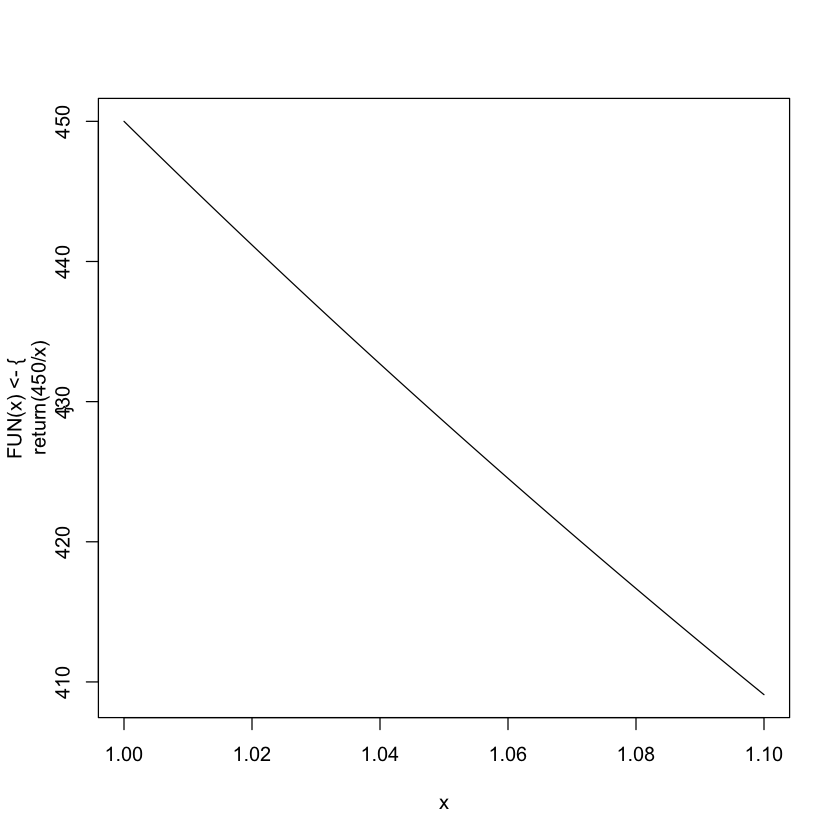

In [17]:
curve(FUN(x)<-{ return(450/x) }, from = 1, to = 1.1)

In [34]:
body.fat.2 = subset(dt.fat, select = c(-IDNO, -DENSITY))[-c(39, 42), ]
model.full.2 = lm(BODYFAT  ~ ., body.fat.2)

model.aic.both.2 = step(model.full.2, direction = "both", k = 2, trace = 0)
summary(model.aic.both.2)


Call:
lm(formula = BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + 
    HIP + FOREARM + WRIST, data = body.fat.2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.545 -2.849 -0.382  2.818  9.238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.31675    6.88371   0.482 0.630367    
AGE          0.05961    0.02592   2.300 0.022300 *  
ADIPOSITY    0.58099    0.22662   2.564 0.010963 *  
NECK        -0.37539    0.20409  -1.839 0.067093 .  
CHEST       -0.19875    0.08815  -2.255 0.025057 *  
ABDOMEN      0.79345    0.08204   9.672  < 2e-16 ***
HIP         -0.17778    0.09965  -1.784 0.075677 .  
FOREARM      0.28439    0.18069   1.574 0.116831    
WRIST       -1.71721    0.44551  -3.854 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.93 on 241 degrees of freedom
Multiple R-squared:  0.7466,	Adjusted R-squared:  0.7382 
F-statistic: 88.77 on 8 and 241 DF,  p-value: < 2.2e-16


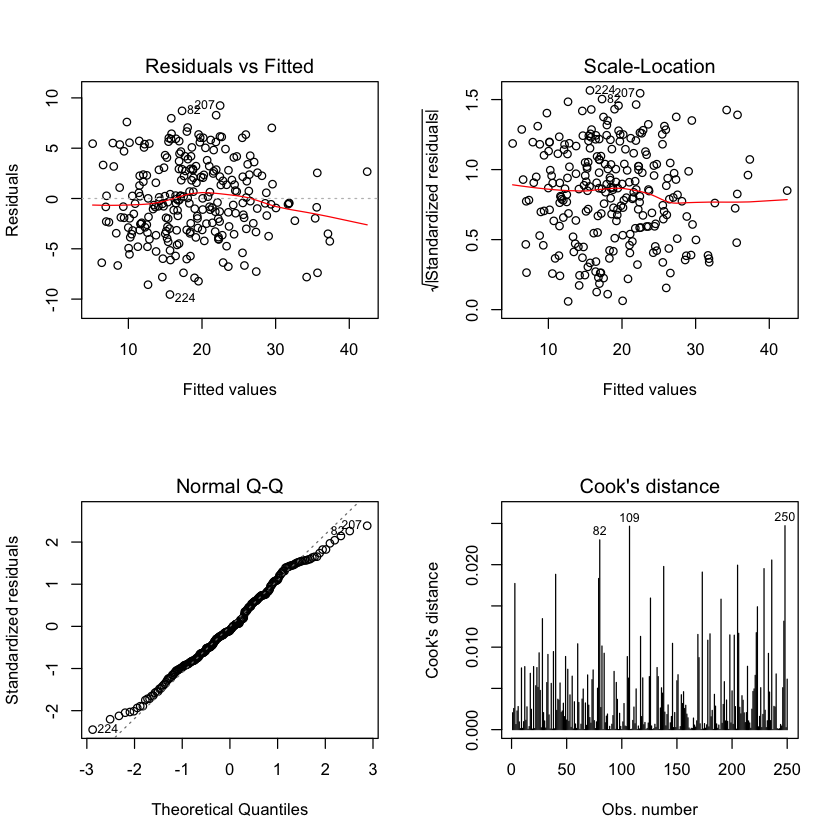

In [36]:
layout(matrix(1:4, ncol = 2))
plot(model.aic.both.2, 1:4)

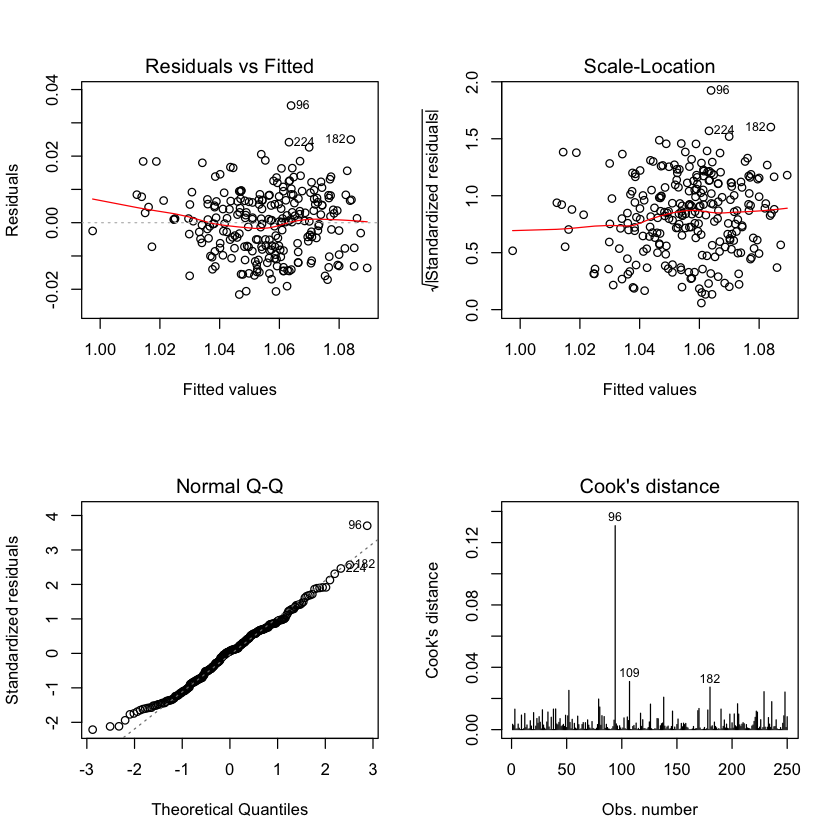

In [37]:
layout(matrix(1:4, ncol = 2))
plot(model.aic.both, 1:4)

In [39]:
library(tidyverse)
library(caret)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [49]:
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(BODYFAT ~., data = dt.fat[-c(39, 42), colnames(model.aic.both.2$model)], method = "lm",
               trControl = train.control)
print(model)

Linear Regression 

250 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 226, 225, 224, 226, 226, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.995528  0.7229491  3.284879

Tuning parameter 'intercept' was held constant at a value of TRUE


In [50]:
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(DENSITY ~., data = dt.fat[-c(39, 42), colnames(model.aic.both$model)], method = "lm",
               trControl = train.control)
print(model)

Linear Regression 

250 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 224, 226, 225, 224, 226, 226, ... 
Resampling results:

  RMSE        Rsquared   MAE        
  0.01012867  0.7174105  0.008256685

Tuning parameter 'intercept' was held constant at a value of TRUE
